In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_wine
import seaborn as sns

In [3]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset shape:", df.shape)
print("\nFeature names:", list(data.feature_names))
print("\nTarget distribution:")
print(df['target'].value_counts())
print("\nFirst few rows:")
print(df.iloc[:, :5].head())

Dataset shape: (178, 14)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64

First few rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium
0    14.23        1.71  2.43               15.6      127.0
1    13.20        1.78  2.14               11.2      100.0
2    13.16        2.36  2.67               18.6      101.0
3    14.37        1.95  2.50               16.8      113.0
4    13.24        2.59  2.87               21.0      118.0


In [4]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("--- Decision Tree Classification ---")
print(f"Accuracy: {accuracy:.4f}")

--- Decision Tree Classification ---
Accuracy: 0.9444



--- Confusion Matrix ---
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


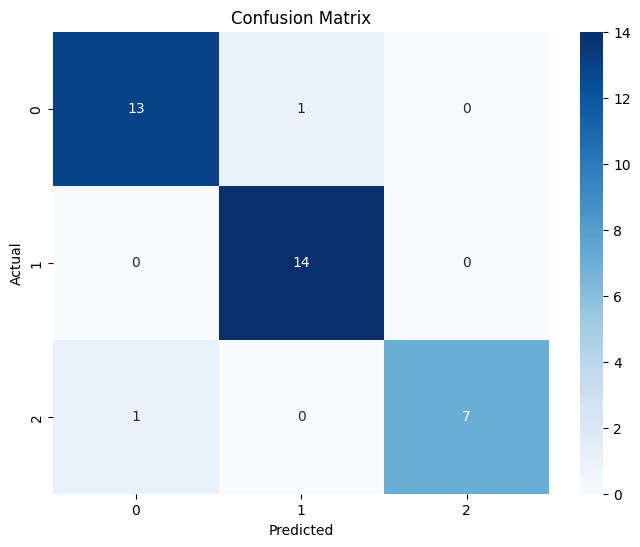

In [6]:
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=data.target_names))


--- Classification Report ---
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



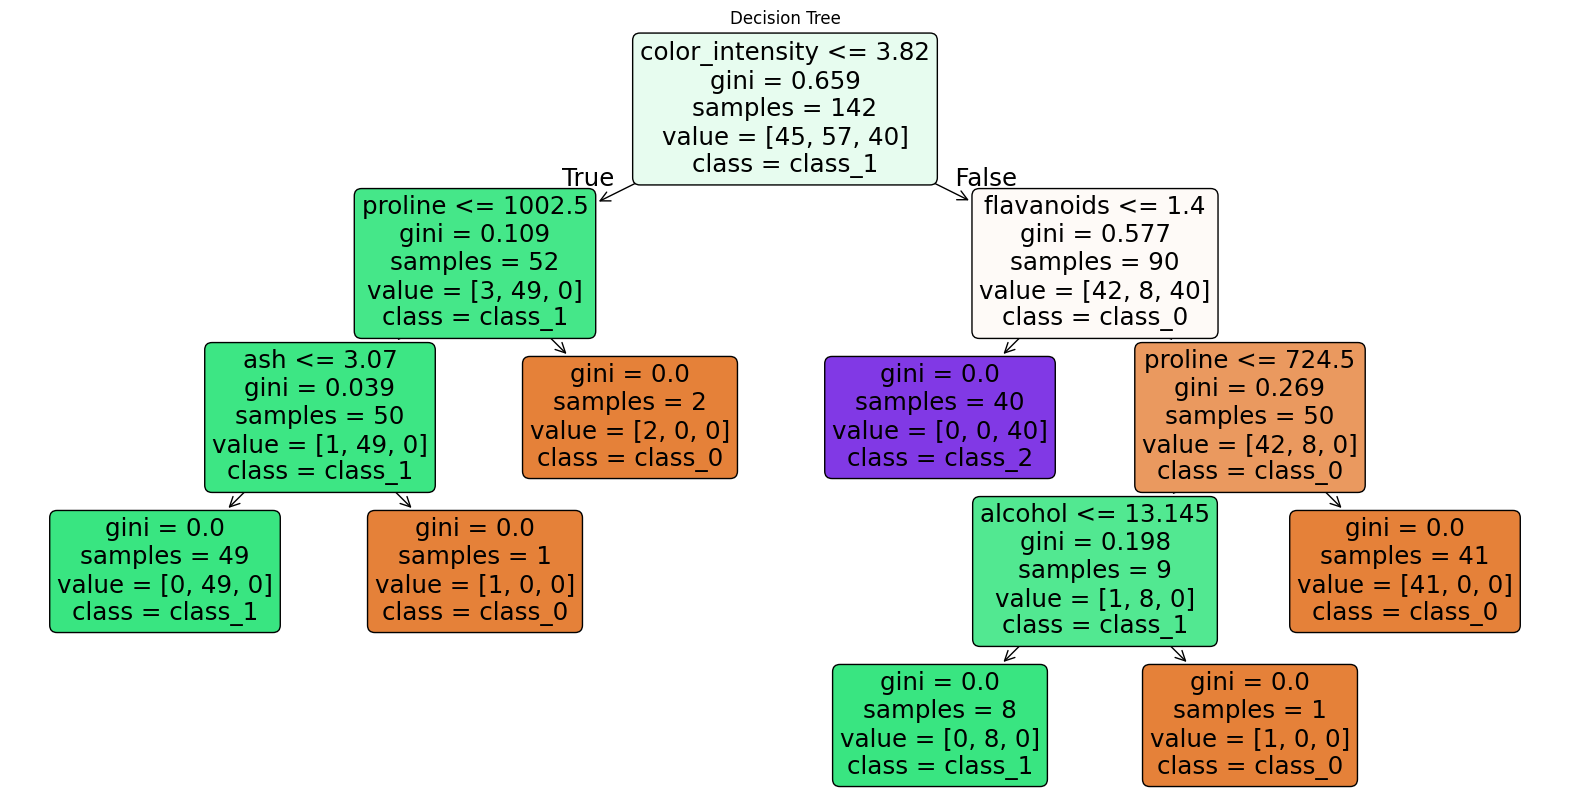

In [9]:
plt.figure(figsize=(20, 10))
from sklearn.tree import plot_tree
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()